In [1]:
!pip install dfply

In [148]:
import pandas as pd
from dfply import *
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
!ls ../data

Assignment 2 - new.app4.csv
Assignment 3 - timeseries_data.xlsx
Assignment 4 - dataset.xlsx
Fundamental of Power Market Economics.pdf
new.app4.csv
USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv


In [44]:
hourly = pd.read_csv('../data/USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv')
new = pd.read_csv('../data/new.app4.csv', parse_dates=['time'])

In [45]:
hourly.head(3)

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly)
0,01/01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803
1,01/01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084
2,01/01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442


In [109]:
# extract month, day, and hour from Date/Time
hourly_month = [int(t[1:3]) for t in hourly['Date/Time']]
hourly_day = [int(t[4:6]) for t in hourly['Date/Time']]
hourly_hour = [int(t[8:10]) for t in hourly['Date/Time']]

In [115]:
hourly = (hourly >>
             mutate(month=hourly_month, day=hourly_day, hour=hourly_hour))
hourly.head()

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),month,day,hour
0,01/01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,1,1,1
1,01/01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,1,1,2
2,01/01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,1,1,3
3,01/01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,1,1,4
4,01/01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,1,1,5


In [46]:
new.head(3)

,Unnamed: 0,time,W_min
0,1,2013-06-07 11:04:00,1142.919571
1,2,2013-06-07 11:05:00,371.239567
2,3,2013-06-07 11:06:00,367.887333


In [68]:
# aggregate hourly comsumptions by month, day, and hour
new_month = pd.DatetimeIndex(new.time).month
new_day = pd.DatetimeIndex(new.time).day
new_hour = pd.DatetimeIndex(new.time).hour

In [75]:
new_hourly = (new >>
             mutate(month=new_month, day=new_day, hour=new_hour) >>
             group_by(X.month, X.day, X.hour) >>
             summarize(W_hour=X.W_min.sum()) >>
             select(X.month, X.day, X.hour, X.W_hour))

In [77]:
new_hourly.head()

,month,day,hour,W_hour
0,6,7,11,57388.943382
1,6,7,12,27227.961318
2,6,7,13,111476.298141
3,6,7,14,109021.960420
4,6,7,15,5773.963306


In [142]:
# merge two data sets and create new total column 
df = (hourly >>
     left_join(new_hourly, by=['month','day','hour']) >>
     mutate(kW_hour=X.W_hour/1000) >>
     select(~X.W_hour))

In [144]:
df['total'] = df.sum(axis=1)-df.month-df.day-df.hour

In [145]:
df.head()

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),month,day,hour,kW_hour,total
0,01/01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,1,1,1,NaN,11.035430
1,01/01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,1,1,2,NaN,11.496637
2,01/01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,1,1,3,NaN,11.757447
3,01/01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,1,1,4,NaN,11.885034
4,01/01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,1,1,5,NaN,12.323477


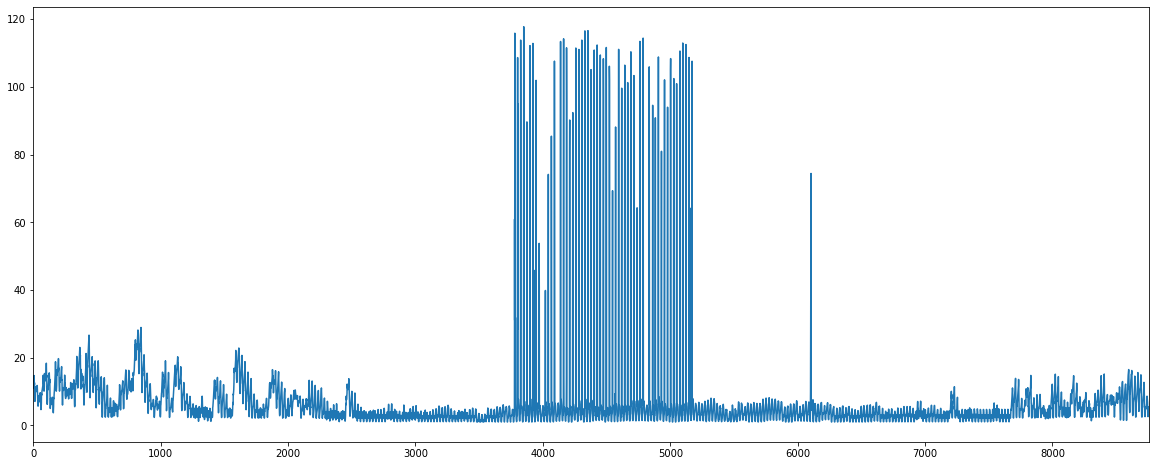

In [153]:
plt.figure(figsize=(20, 8))
df.total.plot()
plt.show()